# Future Career Prediction

This project predicts house prices using Linear Regression, Random Forest, Ridge Regression, Gradient Boosting Regressor (GBR) and Decision Tree models

# 1. Introduction

This project predicts the future salary of a person based on their job role, experience level, working type, company size, and other details. The main goal is to help people understand what career may give them a better salary in the future. The dataset contains many job positions from different countries along with their salaries in USD. I built machine-learning models to learn patterns from this data and predict expected salary values. This can help students and professionals make better career decisions. ⭐⭐

# 2. Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import gradio as gr

# 3. Load Dataset

In [80]:
df = pd.read_csv('/kaggle/input/future-career-prediction-with-salaries/salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


# 4. Check Information + Missing Data

In [81]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB
None
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio        

## Handle Missing Values

In [82]:
df = df.dropna()

# 5. Data Graphs

## Salary Distribution

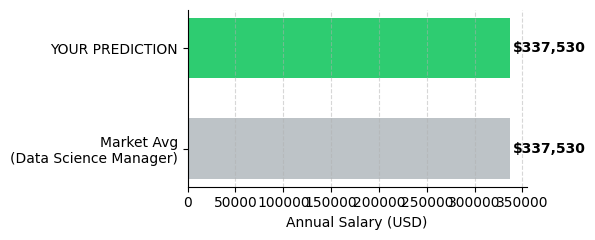

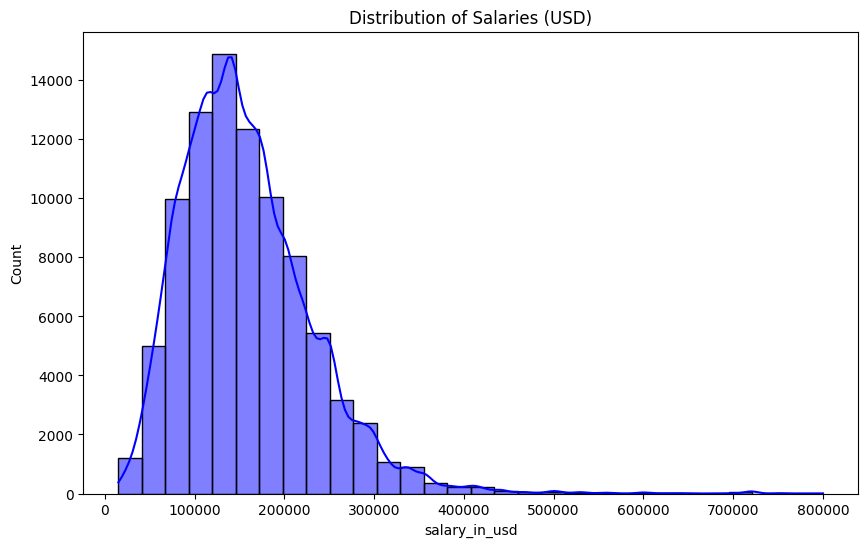

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='blue')
plt.title('Distribution of Salaries (USD)')
plt.show()

## Boxplot of Salaries

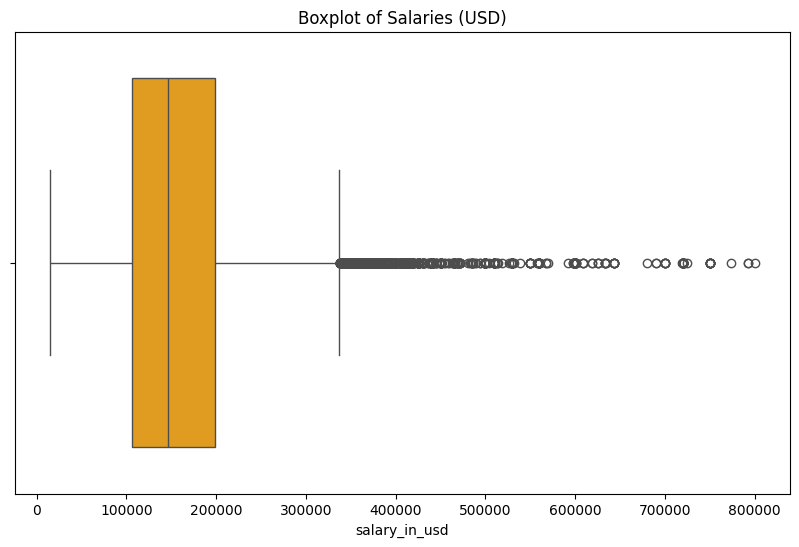

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'], color='orange')
plt.title('Boxplot of Salaries (USD)')
plt.show()

## Top 10 Job Roles

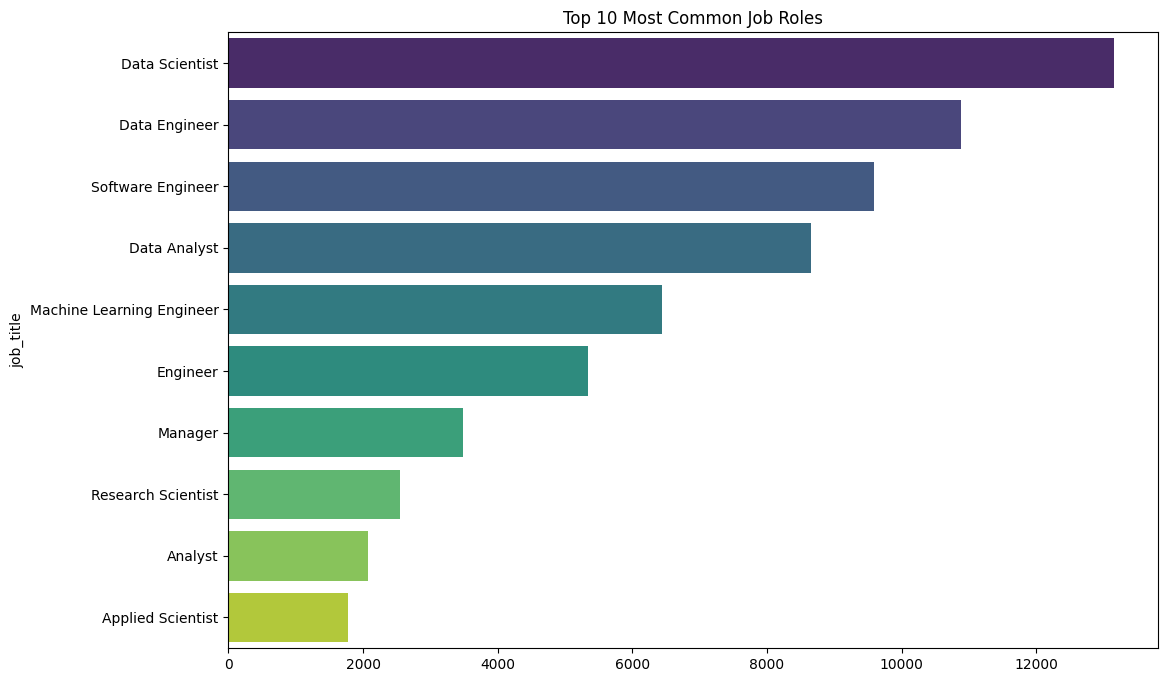

In [85]:
plt.figure(figsize=(12, 8))
top_jobs = df['job_title'].value_counts().head(10)
sns.barplot(y=top_jobs.index, x=top_jobs.values, hue=top_jobs.index, palette='viridis', legend=False)
plt.title('Top 10 Most Common Job Roles')
plt.show()

## Salary vs Experience

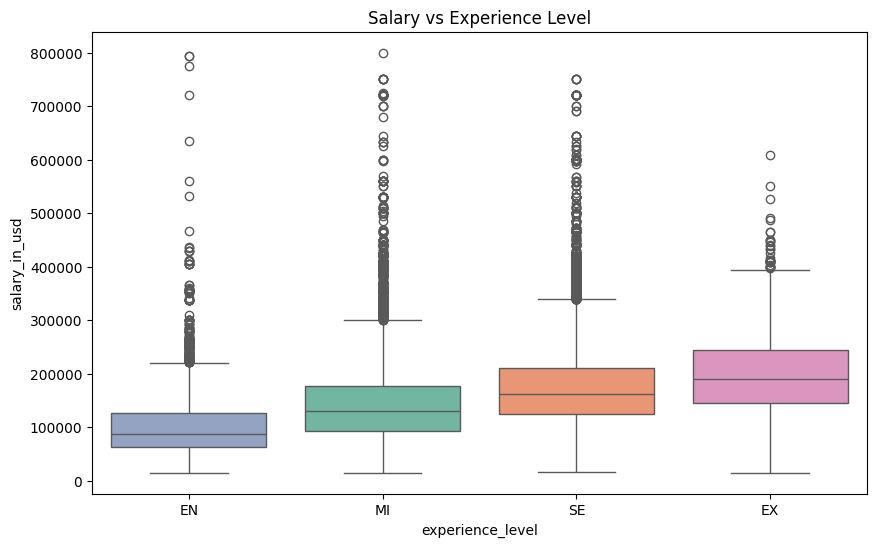

In [86]:
plt.figure(figsize=(10, 6))
# Only include levels that actually exist in your data
order = [x for x in ['EN', 'MI', 'SE', 'EX'] if x in df['experience_level'].unique()]
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=order, hue='experience_level', palette='Set2', legend=False)
plt.title('Salary vs Experience Level')
plt.show()

# 6. Encode Categorical Columns

In [87]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    "experience_level", "employment_type", "job_title", 
    "salary_currency", "employee_residence", "company_location", "company_size"
]

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    
print("Encoding complete. Encoders saved.")

Encoding complete. Encoders saved.


# 7. Correlation Heatmap

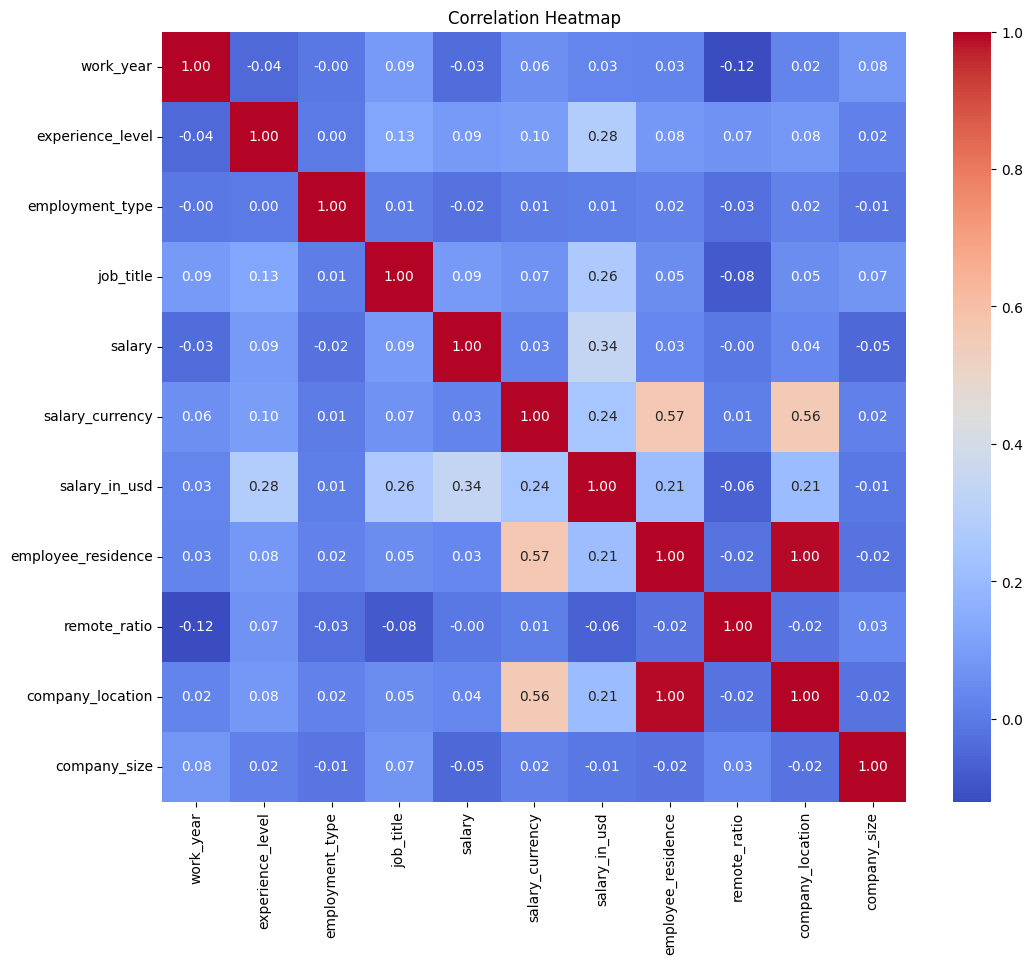

In [88]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 8. Select Features & Target

In [89]:
X = df.drop("salary_in_usd", axis=1)
y = df["salary_in_usd"]

# 9. Train & Test Split

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 10. Feature Scaling

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 11. Model Training

## Initialize

In [92]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

## Train

In [93]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("All models trained successfully.")

All models trained successfully.


# 12. Compare Results

## Predictions

In [94]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

## Metrics

In [95]:
metrics = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
}

results_df = pd.DataFrame(metrics)
print(results_df)

               Model           MSE  R2 Score
0  Linear Regression  4.625599e+09  0.162497
1      Decision Tree  4.545385e+07  0.991770
2      Random Forest  2.506413e+07  0.995462


## Plotting the comparison

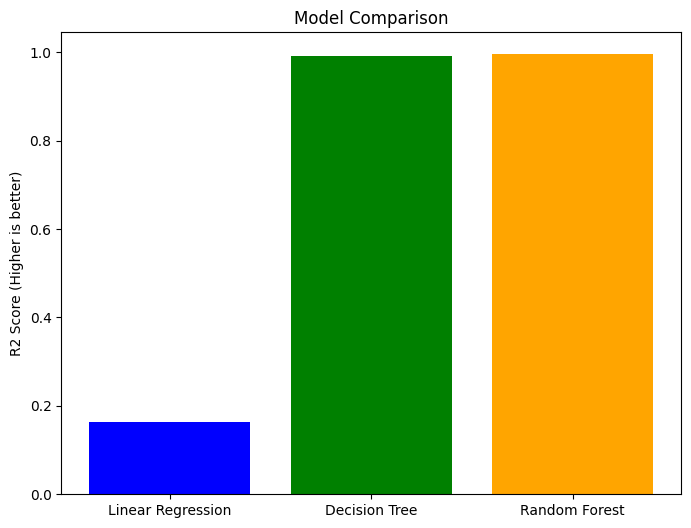

In [96]:
plt.figure(figsize=(8, 6))
plt.bar(results_df['Model'], results_df['R2 Score'], color=['blue', 'green', 'orange'])
plt.ylabel('R2 Score (Higher is better)')
plt.title('Model Comparison')
plt.show()

# 13. Pick Random Forest & Save

In [97]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Model and Encoders saved!")

Model and Encoders saved!


# 14. Evaluation Function

In [98]:
def evaluate_model(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

# 15. Visualization

## Scatter Plot: Actual vs Predicted Salary (Random Forest)

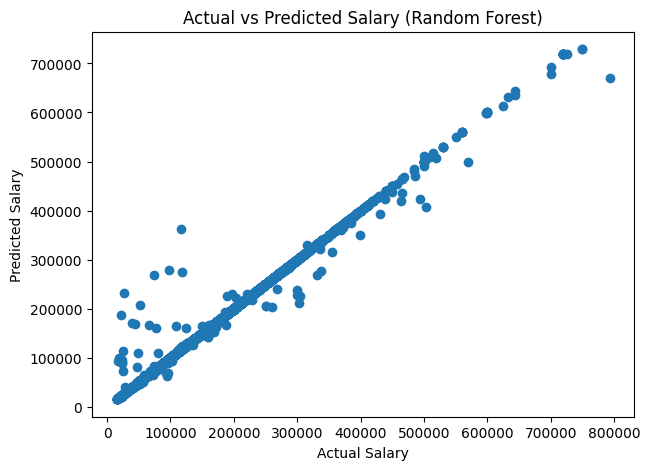

In [99]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Random Forest)")
plt.show()

## Error Distribution Plot

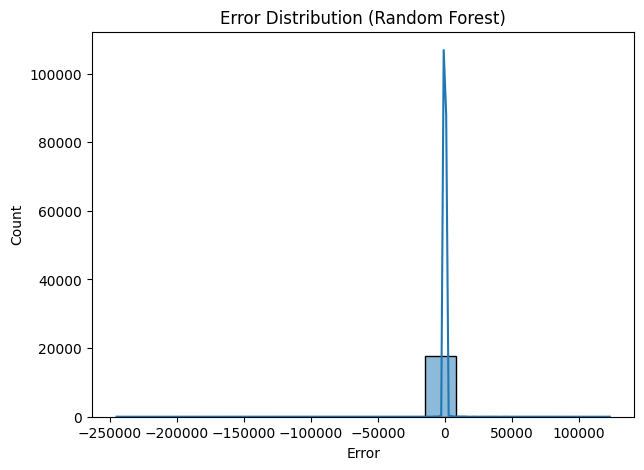

In [100]:
errors = y_test - y_pred_rf
plt.figure(figsize=(7,5))
sns.histplot(errors, kde=True)
plt.title("Error Distribution (Random Forest)")
plt.xlabel("Error")
plt.show()

## Feature Importance Graph

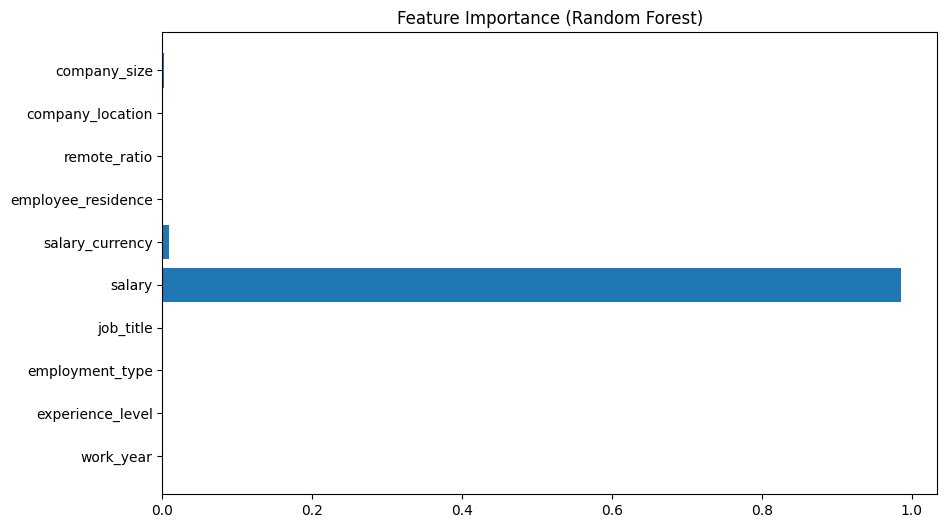

In [101]:
plt.figure(figsize=(10,6))
importance = rf.feature_importances_
plt.barh(X.columns, importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

## Scatter Plot (MSE vs R²)

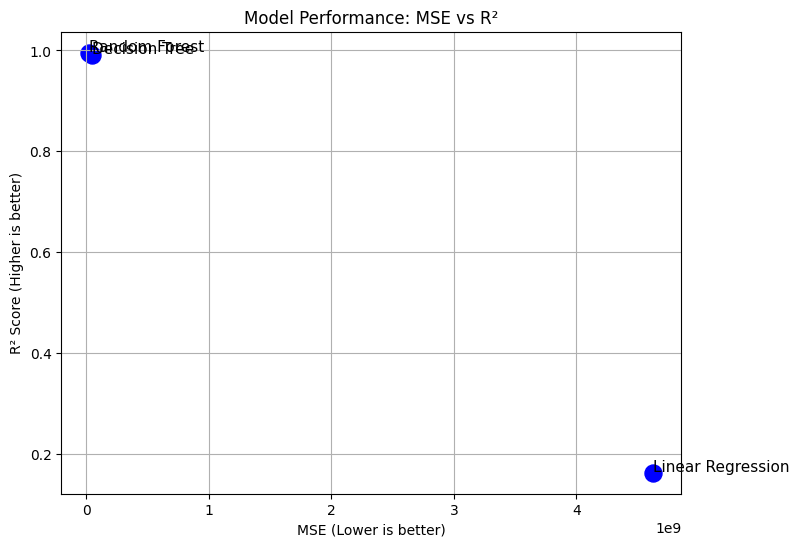

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

metrics = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
}

results_df = pd.DataFrame(metrics)

plt.figure(figsize=(8, 6))
plt.scatter(results_df["MSE"], results_df["R² Score"], s=150, color='blue')

for i, row in results_df.iterrows():
    plt.text(row["MSE"], row["R² Score"] + 0.002, row["Model"], fontsize=11)

plt.xlabel("MSE (Lower is better)")
plt.ylabel("R² Score (Higher is better)")
plt.title("Model Performance: MSE vs R²")
plt.grid(True)
plt.show()

# 16. Gradio Interface

In [103]:
from sklearn.model_selection import train_test_split

X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)

print("Success! The model is fixed.")
print(f"It is successfuly showing {X.shape[1]} features.")

Success! The model is fixed.
It is successfuly showing 8 features.


## Build Grade UI

In [104]:
# 1. CONFIGURATION & MAPPINGS
EXP_MAP = {
    "Entry Level / Junior": "EN",
    "Mid-Level / Intermediate": "MI",
    "Senior Level / Expert": "SE",
    "Executive Level / Director": "EX"
}

EMP_MAP = {
    "Full Time": "FT",
    "Part Time": "PT",
    "Contract": "CT",
    "Freelance": "FL"
}

SIZE_MAP = {
    "Small (<50 employees)": "S",
    "Medium (50-250 employees)": "M",
    "Large (>250 employees)": "L"
}

COUNTRY_MAP = {
    "US": "United States", "IN": "India", "GB": "United Kingdom", "CA": "Canada", 
    "DE": "Germany", "FR": "France", "ES": "Spain", "BR": "Brazil", 
    "AU": "Australia", "NL": "Netherlands", "PL": "Poland", "PT": "Portugal",
    "TR": "Turkey", "CH": "Switzerland", "IT": "Italy", "MX": "Mexico",
    "GR": "Greece", "JP": "Japan", "CN": "China", "AE": "UAE"
}
COUNTRY_NAME_TO_CODE = {v: k for k, v in COUNTRY_MAP.items()}


# 2. DATA PREPARATION (For Dropdowns & Analytics)

job_averages = {}

try:
    if 'df' in locals():
        df_clean = df.copy()
    else:
        df_clean = pd.read_csv('salaries.csv')
    
    if 'salary_in_usd' in df_clean.columns and 'job_title' in df_clean.columns:
        job_averages = df_clean.groupby('job_title')['salary_in_usd'].mean().to_dict()
        
except Exception as e:
    print(f"Data Warning: {e}. Using fallback lists.")
    df_clean = pd.DataFrame() 

top_jobs_list = [
    "Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", 
    "Analytics Engineer", "Research Scientist", "Data Architect", "Business Intelligence Engineer",
    "Applied Scientist", "Research Engineer", "Data Science Manager", "AI Engineer",
    "Head of Data", "Data Specialist", "BI Developer", "Computer Vision Engineer"
]

top_locations_list = [
    "United States", "United Kingdom", "Canada", "India", "Germany", "France", 
    "Spain", "Australia", "Brazil", "Netherlands", "Portugal", "Italy", "Mexico", "UAE"
]

# 3. ADVANCED PREDICTION ENGINE

def predict_salary_pro(work_year, experience_full, employment_full, job_title, 
                       residence_full, remote_ratio, location_full, size_full):
    
    experience_code = EXP_MAP.get(experience_full, "MI") 
    employment_code = EMP_MAP.get(employment_full, "FT")
    size_code = SIZE_MAP.get(size_full, "M")
    residence_code = COUNTRY_NAME_TO_CODE.get(residence_full, residence_full)
    location_code = COUNTRY_NAME_TO_CODE.get(location_full, location_full)

    input_data = pd.DataFrame({
        'work_year': [work_year],
        'experience_level': [experience_code],
        'employment_type': [employment_code],
        'job_title': [job_title],
        'employee_residence': [residence_code],
        'remote_ratio': [remote_ratio],
        'company_location': [location_code],
        'company_size': [size_code]
    })
    
    correct_order = ['work_year', 'experience_level', 'employment_type', 'job_title', 
                     'employee_residence', 'remote_ratio', 'company_location', 'company_size']
    input_data = input_data.reindex(columns=correct_order, fill_value=0)

    for col in input_data.columns:
        if col in label_encoders:
            try:
                input_data[col] = label_encoders[col].transform(input_data[col])
            except ValueError:
                input_data[col] = 0 

    try:
        prediction = rf.predict(input_data)[0]
    except Exception as e:
        return "Error", f"Error: {str(e)}", None

    market_avg = job_averages.get(job_title, prediction)
    
    fig, ax = plt.subplots(figsize=(6, 2.5))
    categories = [f'Market Avg\n({job_title})', 'YOUR PREDICTION']
    values = [market_avg, prediction]
    colors = ['#bdc3c7', '#2ecc71'] 

    bars = ax.barh(categories, values, color=colors, height=0.6)
    ax.set_xlabel("Annual Salary (USD)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 2000, bar.get_y() + bar.get_height()/2, 
                f'${width:,.0f}', va='center', fontweight='bold')

    plt.tight_layout()

    salary_text = f"${prediction:,.0f}"
    
    advice = []
    advice.append(f"### 💡 Career Analysis for {job_title}")
    
    diff = prediction - market_avg
    if diff > 5000:
        advice.append(f"✅ **Great News:** You are trending **${diff:,.0f} above** the market average for this role!")
    elif diff < -5000:
        advice.append(f"⚠️ **Notice:** Your estimate is slightly below the market average. Consider negotiating for equity or signing bonuses.")
    else:
        advice.append(f"⚖️ **Fair Market Value:** Your estimate is right in line with industry standards.")

    if residence_full != location_full:
        advice.append(f"✈️ **Relocation Alert:** You are applying from **{residence_full}** to **{location_full}**. Ensure you check visa sponsorship requirements and relocation packages.")

    if experience_code == "EN":
        advice.append("🎓 **Junior Tip:** Focus on building a portfolio. Jump to Mid-Level usually happens after 1.5 - 2 years.")
    elif experience_code == "SE":
        advice.append("🚀 **Senior Tip:** At this level, total compensation (Stock/Bonus) often matters more than base salary.")

    return salary_text, "\n\n".join(advice), fig


# 4. CSS & UI LAYOUT

custom_css = """
#main_salary_box textarea {
    font-size: 40px !important;
    font-weight: bold !important;
    color: #16a085 !important;
    text-align: center !important;
}
"""

theme = gr.themes.Soft(primary_hue="emerald", secondary_hue="gray")

with gr.Blocks(theme=theme, css=custom_css, title="Pro Career Predictor") as demo:
    
    with gr.Row():
        gr.Markdown(
            """
            # 🔮 AI Future Career Predictor
            ### Professional Salary Analytics Dashboard
            """
        )
    
    gr.Markdown("---")
    
    with gr.Row():
        
        with gr.Column(scale=1, min_width=300):
            gr.Markdown("### 🛠️ Configure Profile")
            
            with gr.Group():
                job_in = gr.Dropdown(choices=top_jobs_list, label="Target Job Title", value="Data Scientist")
                exp_in = gr.Dropdown(choices=list(EXP_MAP.keys()), label="Experience Level", value="Senior Level / Expert")
                emp_in = gr.Dropdown(choices=list(EMP_MAP.keys()), label="Employment Type", value="Full Time")
            
            with gr.Group():
                res_in = gr.Dropdown(choices=top_locations_list, label="Current Residence", value="United States")
                loc_in = gr.Dropdown(choices=top_locations_list, label="Target Company Location", value="United States")
                remote_in = gr.Slider(0, 100, step=50, label="Remote Work Ratio %")
            
            with gr.Accordion("Advanced Company Details", open=False):
                year_in = gr.Slider(2023, 2026, step=1, label="Prediction Year", value=2025)
                size_in = gr.Dropdown(choices=list(SIZE_MAP.keys()), label="Company Size", value="Medium (50-250 employees)")
            
            submit_btn = gr.Button("🚀 Analyze & Predict", variant="primary", size="lg")

        with gr.Column(scale=2, min_width=400):
            gr.Markdown("### 📊 Market Analysis Results")
            
            out_salary = gr.Textbox(label="Estimated Annual Base Salary", elem_id="main_salary_box")
            
            out_plot = gr.Plot(label="Market Comparison")
            
            out_advice = gr.Markdown("Enter your details and click Predict to see AI insights...")

    submit_btn.click(
        fn=predict_salary_pro,
        inputs=[year_in, exp_in, emp_in, job_in, res_in, remote_in, loc_in, size_in],
        outputs=[out_salary, out_advice, out_plot]
    )
    
    gr.Markdown("---")
    gr.Markdown("<center><i>Powered by Random Forest Regression • Market Data 2020-2025</i></center>")

# Launch
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://8645ead7353a75396d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
